In [2]:
import numpy as np
import xarray as xr
import geoutils.preprocessing.interpolate as interp
import geoutils.preprocessing.open_nc_file as of
import geoutils.utils.spatial_utils as sput
import geoutils.utils.general_utils as gut
import geoutils.plotting.plots as cplt
from importlib import reload

data_folder = '/home/strnad/Nextcloud/tmp/'
data_file1 = f'{data_folder}/lai_3xCO2_CESM.nc'
data_file2 = f'{data_folder}/lai_3xCO2_COSMOS.nc'


In [11]:
reload(interp)
reload(of)
data1_of = of.open_nc_file(data_file1, lon_2_180=True)

method = 'nearest'
grid_step = 1
data1_nearest = interp.interpolate_grid(dataarray=data1_of,
                                        method='nearest',
                                        grid_step=grid_step)
data1_linear = interp.interpolate_grid(dataarray=data1_of,
                                       method='linear',
                                       grid_step=grid_step)

dat1_res = sput.get_grid_step(data1_of)
data_intp_res = sput.get_grid_step(data1_nearest)
gut.myprint(f'Interpolate from {dat1_res} to {data_intp_res}')

Start Loading data...
Open files: /home/strnad/Nextcloud/tmp//lai_3xCO2_CESM.nc


Read data from store
Check dimensions of dataset!
Rename:Lon : lon
['lon', 'Lat', 'year']
Rename:Lat : lat
['lon', 'lat', 'year']
Checked labelling according to netcdf conventions!
Checked order of dimensions!
Shift longitude -180 - 180!
Sorted longitudes and latitudes in ascending order!
End processing data! Dimensions: ['lon', 'lat', 'year']
WARNING! Set max lon from 177.5 to 179.75!
Interpolte grid from -180.0 to 179.0,-90.0 to 80.0  with grid_step 1!
WARNING! Set max lon from 177.5 to 179.75!
Interpolte grid from -180.0 to 179.0,-90.0 to 80.0  with grid_step 1!
Different grid step in lon 2.5 and lat 1.89 direction!
Interpolate from (1.89, 2.5, 1.89) to (1.0, 1.0, 1.0)


'Interpolate from (1.89, 2.5, 1.89) to (1.0, 1.0, 1.0)'

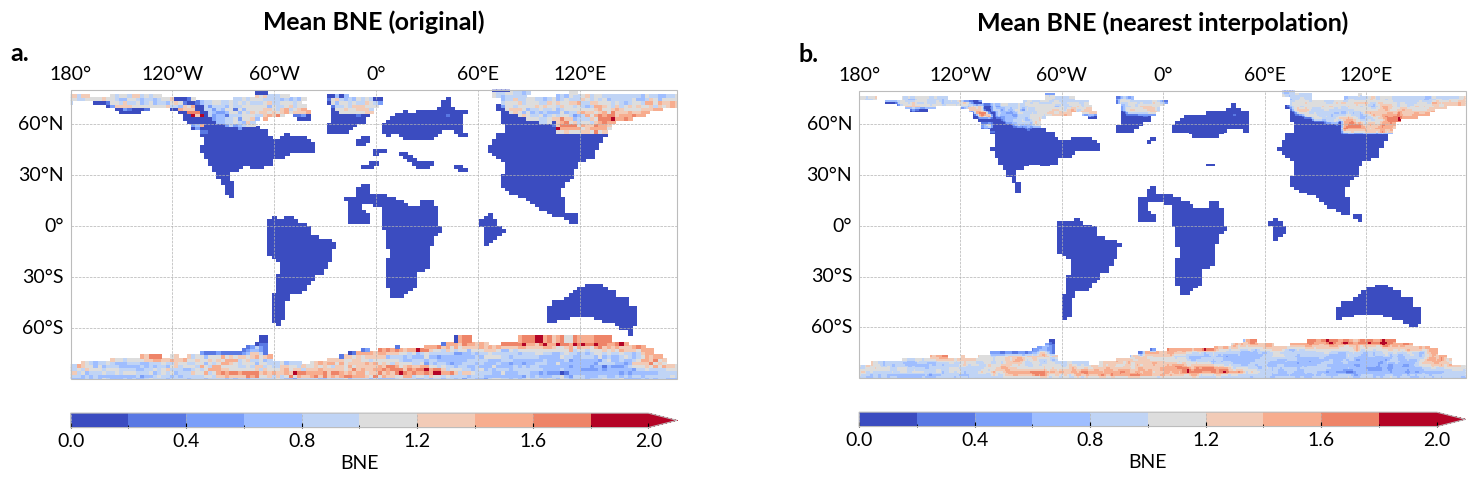

In [14]:
label_lai = 'BNE'

mean_BNE_nearest = data1_nearest[label_lai].mean(dim='year')
mean_BNE_linear = data1_linear[label_lai].mean(dim='year')
mean_BNE_orig = data1_of[label_lai].mean(dim='year')

vmin_bne = 0
vmax_bne = 2

im = cplt.create_multi_plot(nrows=1, ncols=2, figsize=(18, 5),
                            projection='PlateCarree', wspace=0.3,)

cplt.plot_map(mean_BNE_orig.T,
                   ax=im['ax'][0],
                   title=f'Mean BNE (original)',
                   plot_type='colormesh',
                   cmap='coolwarm',
                   levels=10,
                   label=label_lai,
                   vmin=vmin_bne, vmax=vmax_bne,
                   tick_step=2,
                   extend='max',
                   orientation='horizontal',
                   set_map=False,
                   )

im2 = cplt.plot_map(mean_BNE_linear.T,
                   ax=im['ax'][1],
                   title=f'Mean BNE (nearest interpolation)',
                   plot_type='colormesh',
                   cmap='coolwarm',
                   levels=10,
                   label=label_lai,
                   vmin=vmin_bne, vmax=vmax_bne,
                   tick_step=2,
                   extend='max',
                   orientation='horizontal',
                   set_map=False,
                   )

# im2 = cplt.plot_map(mean_BNE_linear.T,
#                    ax=im['ax'][2],
#                    title=f'Mean BNE (linear interpolation)',
#                    plot_type='colormesh',
#                    cmap='Paired',
#                    levels=10,
#                    label=label_lai,
#                    vmin=vmin_bne, vmax=vmax_bne,
#                    tick_step=2,
#                    extend='max',
#                    orientation='horizontal',
#                    set_map=False,
#                    )